In [62]:
import pandas as pd
import numpy as np

from glob import glob

import cv2
import matplotlib.pylab as plt

plt.style.use('ggplot')

# Reading in images

In [89]:
cat_files = glob('Assets/Cat/*')
dog_files = glob('Assets/Dog/*')

if len(cat_files) == 0 or len(dog_files) == 0:
    print("No image found in the specified folders.")
else:
    print(f"{len(cat_files)} cat images found, \n{len(dog_files)} dog images found.")

6 cat images found, 
8 dog images found.


In [90]:
for file in cat_files[:]:
    img_mpl = plt.imread(file)
    img_cv2 = cv2.imread(file)

    print("------------------")
    print(f"Processing {file}")
    print("Shape using Matplotlib:", img_mpl.shape)
    print("Shape using OpenCV:", img_cv2.shape)

------------------
Processing Assets/Cat\cat1.jpg
Shape using Matplotlib: (315, 512, 3)
Shape using OpenCV: (315, 512, 3)
------------------
Processing Assets/Cat\cat2.jpg
Shape using Matplotlib: (423, 700, 3)
Shape using OpenCV: (423, 700, 3)
------------------
Processing Assets/Cat\cat3.jpg
Shape using Matplotlib: (1386, 2164, 3)
Shape using OpenCV: (1386, 2164, 3)
------------------
Processing Assets/Cat\cat4.jpeg
Shape using Matplotlib: (164, 308, 3)
Shape using OpenCV: (164, 308, 3)
------------------
Processing Assets/Cat\cat5.jpeg
Shape using Matplotlib: (204, 248, 3)
Shape using OpenCV: (204, 248, 3)
------------------
Processing Assets/Cat\cat6.jpg
Shape using Matplotlib: (1160, 2000, 3)
Shape using OpenCV: (1160, 2000, 3)


## Image Array
(Height, Width, Channels)

<img src="https://editor.analyticsvidhya.com/uploads/488590%20CI5wgSszZnpHu5Ip.png" alt="imgpixels" style="height: 200px; width:600px;"/>

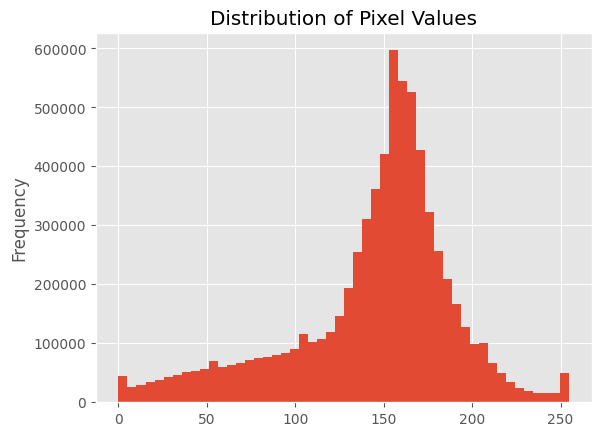

In [65]:
pd.Series(img_mpl.flatten()).plot(kind='hist',bins=50, title='Distribution of Pixel Values')
plt.show()

# Display Images

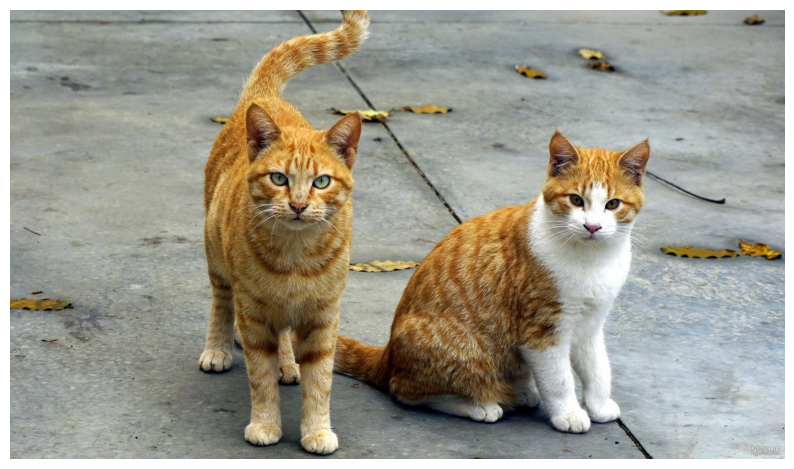

In [66]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img_mpl)
ax.axis('off')
plt.show()

# Image Channels

<img src="https://upload.wikimedia.org/wikipedia/commons/2/28/RGB_illumination.jpg" alt="Result3" style="width:300px;"/>

## RGB Channels

An RGB image has three channels: red, green, and blue. RGB channels roughly follow the color receptors in the human eye, and are used in computer displays and image scanners.



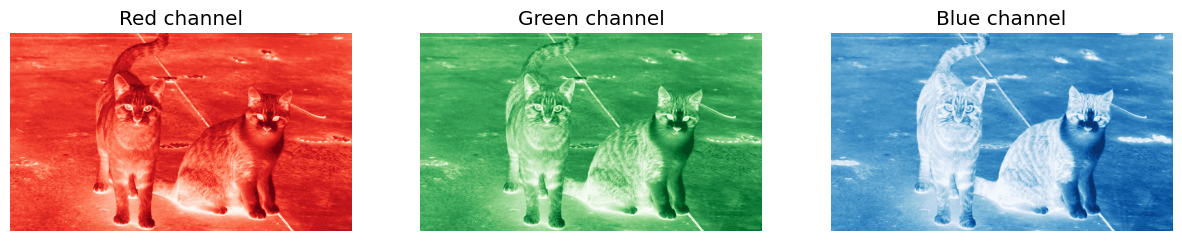

In [67]:
# Display RGB Channels of our image
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img_mpl[:,:,0], cmap='Reds')
axs[1].imshow(img_mpl[:,:,1], cmap='Greens')
axs[2].imshow(img_mpl[:,:,2], cmap='Blues')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
axs[0].set_title('Red channel')
axs[1].set_title('Green channel')
axs[2].set_title('Blue channel')
plt.show()

# Matplotlib vs cv2 Numpy Arrays
- cv2 reads in channels as BGR
- matplotlib reads in channels as RGB

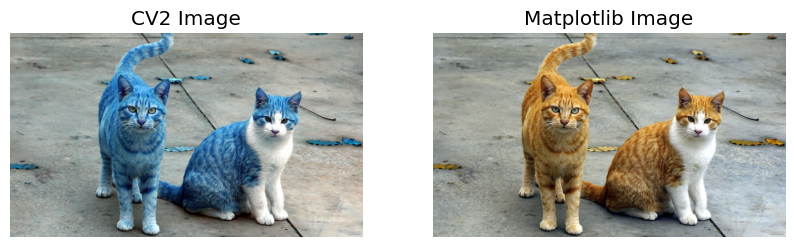

In [68]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_cv2)
axs[1].imshow(img_mpl)
axs[0].axis('off')
axs[1].axis('off')
axs[0].set_title('CV2 Image')
axs[1].set_title('Matplotlib Image')
plt.show()

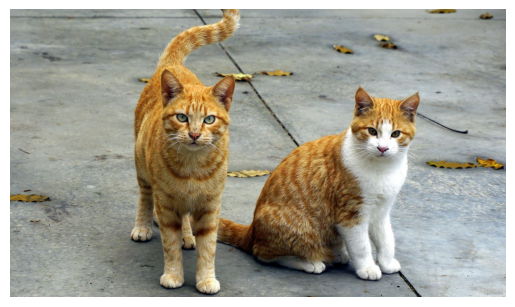

In [69]:
# Converting from BGR to RGB
img_cv2_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots()
ax.imshow(img_cv2_rgb)
ax.axis('off')
plt.show()

# Image Manipulation

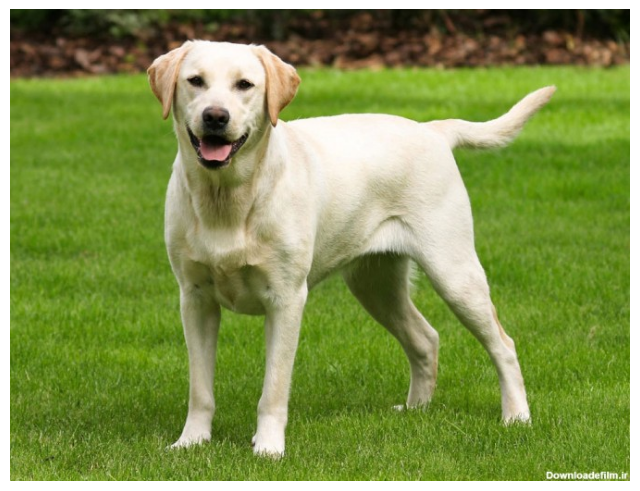

In [97]:
img = plt.imread(dog_files[0])
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img)
ax.axis('off')
plt.show()

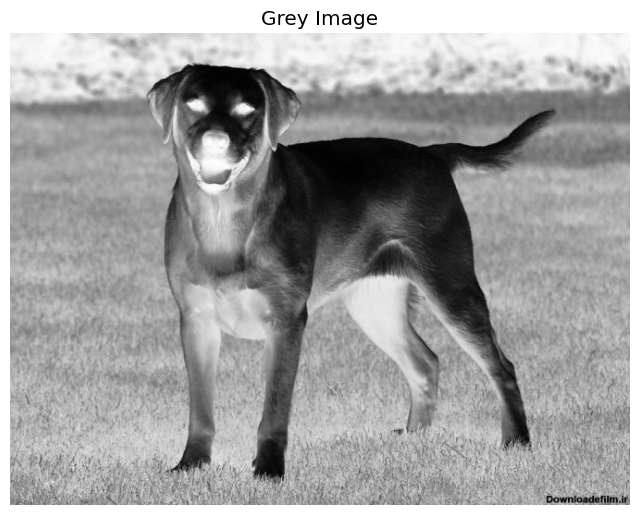

In [98]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_gray, cmap='Greys')
ax.axis('off')
ax.set_title('Grey Image')
plt.show()

# Resizing and Scaling

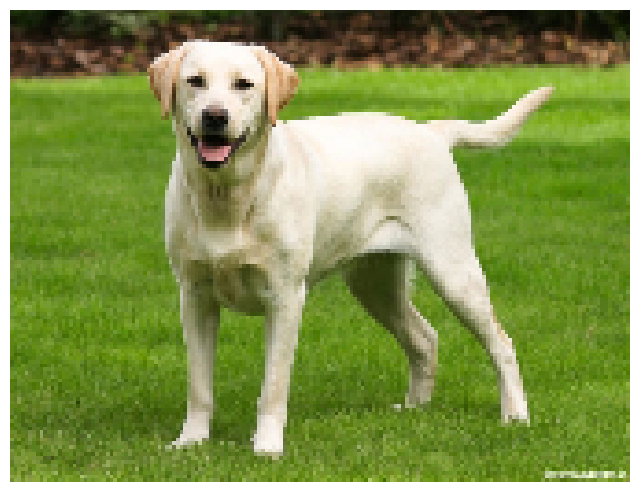

In [72]:
img_resized = cv2.resize(img, None, fx=0.25, fy=0.25)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_resized)
ax.axis('off')
plt.show()

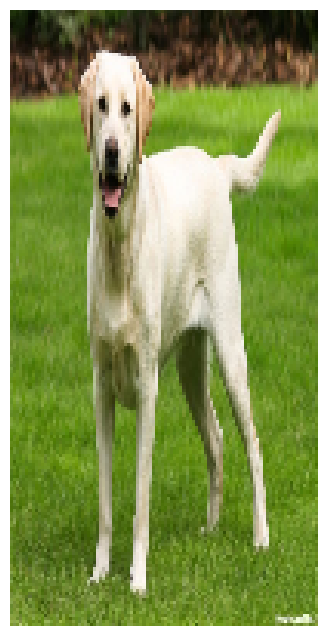

In [73]:
# Different Size
img_resize = cv2.resize(img, (100, 200))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_resize)
ax.axis('off')
plt.show()

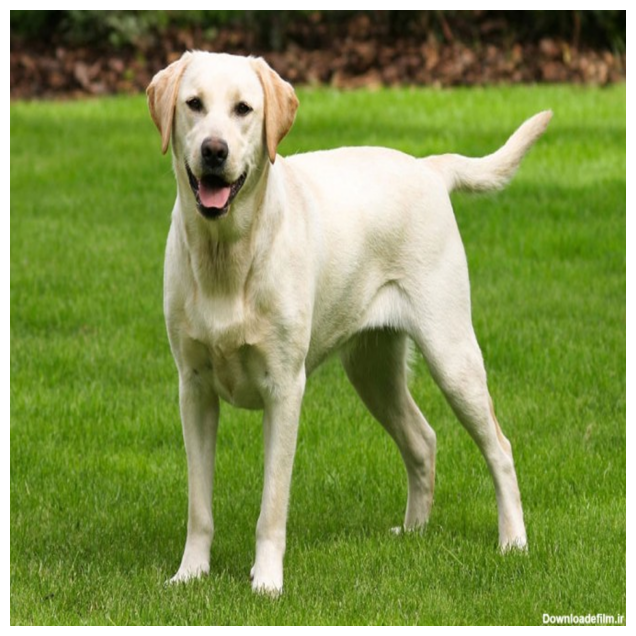

In [74]:
img_resize = cv2.resize(img, (5000, 5000), interpolation = cv2.INTER_CUBIC)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_resize)
ax.axis('off')
plt.show()

# CV2 Kernels
<img src="https://editor.analyticsvidhya.com/uploads/81269Capture.PNG" alt="imgpixels" style="width:400px;"/>

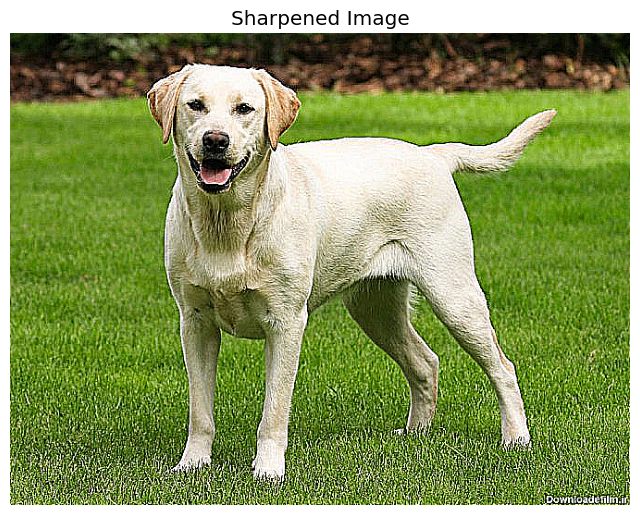

In [75]:
# Sharpen Image
kernel_sharpening = np.array([[-1,-1,-1],
                              [-1,9,-1],
                              [-1,-1,-1]])

sharpened = cv2.filter2D(img, -1, kernel_sharpening)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(sharpened)
ax.axis('off')
ax.set_title('Sharpened Image')
plt.show()

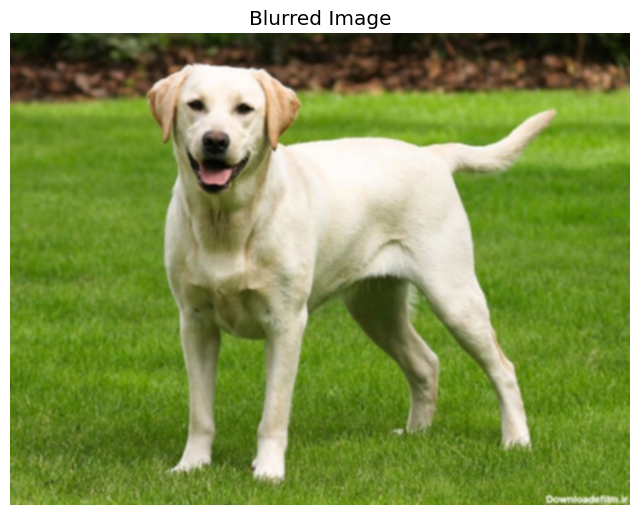

In [76]:
# Blurring the image
kernel_3x3 = np.ones((3, 3), np.float32) / 9
blurred = cv2.filter2D(img, -1, kernel_3x3)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(blurred)
ax.axis('off')
ax.set_title('Blurred Image')
plt.show()

# Save Image

In [77]:
plt.imsave('mpl_dog.png', blurred)
cv2.imwrite('cv2_dog.png', blurred)

True

# The End